In [81]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
import csv

## Variable Setup

The below variables are all givens, the user defines fL, fH, and tc, and f0 comes from the timer clock.

In [108]:
f0 = 19e6 # timer frequency
fL = 20e3 # lower chirp frequency
fH = 30e3 # upper chirp frequency
tc = 2e-3 # chirp duration

And, some other useful constants:

In [109]:
favg = (fH + fL) / 2.0
fgap = fH - fL
tL = 1 / fL
tH = 1/ fH

Total number of timer counts during one period of the square chirp.

In [110]:
ct = int(tc * f0)
print(ct)

38000


Solving for parameters N (total number of frequency changes), and i (the increment amount between frequencies).

In [111]:
N = int(tc * favg)
i = (tH - tL) * f0 / (tc * favg)
print(N, i)

50 -6.333333333333334


But how many counts will we need at each increment? There's a function for that.

In [112]:
c0 = tL * f0
cN = tH * f0

def c(n):
    if n >= 0 and n <= N:
        return c0 + i*n
    return -1

print(c0, cN)

950.0 633.3333333333334


Now, let's piece together a square wave using the above functions:

39700


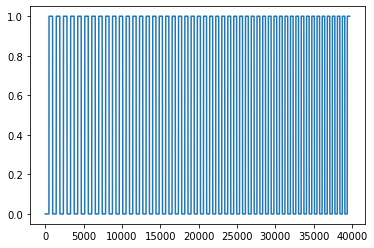

In [113]:
sqwave = []
#39741.666
for n in range(N):
    cn = int(c(n))
    zers = np.zeros(cn//2)
    ones = np.ones (cn//2)
    sqwave = np.concatenate((sqwave, zers, ones), axis=None)
    
print(len(sqwave))
plt.plot(sqwave)

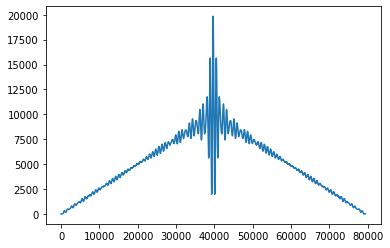

In [114]:
plt.plot(np.correlate(sqwave, sqwave, "full"))

In [107]:
reader = None
recwave = []

with open("listen.csv", "r") as csvfile:
    reader = csv.reader(csvfile)
    recwave = np.array(next(reader))
    
print(recwave.dtype)
csvfile.close()

plt.plot(np.correlate(sqwave, recwave))

<U5


TypeError: Cannot cast array data from dtype('float64') to dtype('<U32') according to the rule 'safe'

In [4]:
BUFFER_SIZE = 2048 #buffer size
SOUND_LENGTH = BUFFER_SIZE / 8
samplef = 19e6 / 32 / 6 #for device
#t = np.arange(0,BUFFER_SIZE/samplef,1/samplef)
f1 = 20e3
f2 = 30e3
#t_sq = np.linspace(0,SOUND_LENGTH/samplef,samplef)
t_sq = np.arange(0,SOUND_LENGTH/samplef,1/samplef)
FREQ_STEPS = 200 / 3.137922859050297
print(FREQ_STEPS)
freq_dist = np.abs(f2-f1)/FREQ_STEPS

num_points = SOUND_LENGTH/FREQ_STEPS
#compute step size for counter based on time, starting, stopping frequency

63.73642979245534


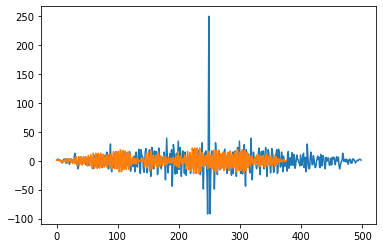

In [64]:
square_new = []
t = 0
for i in range (63): #Why 63?? Can't remember
    f = freq_dist * i + f1
    #print(f)
    t_new = np.arange(t,t+1/f,1/samplef)
    #t_new = np.linspace(t,t+1/f,num_points)
#     print(t_new)
    if len(t_new) != 0:
        t_last = t_new[len(t_new)-1]
    else:
        t_last = 0
#     print(t+1/f,t_last)
    t += t_last
    cycle_pwm = signal.square(2*np.pi*f*t_new)
    for j in cycle_pwm:
        square_new.append(j)
    #square_new.append(cycle_pwm)
    #print(square_new)

#print(SOUND_LENGTH/samplef,t)   
#plt.plot(square_new)
#print(SOUND_LENGTH,len(square_new))
#plt.xlim(800,850)


plt.plot(np.correlate(square_new,square_new,"full"))
s25 = (signal.square(2*np.pi*25000*t_sq))
plt.plot(np.correlate(s25,square_new,"full"))

0.005173894736842106 0.03673723103376182
512.0 895


(800, 850)

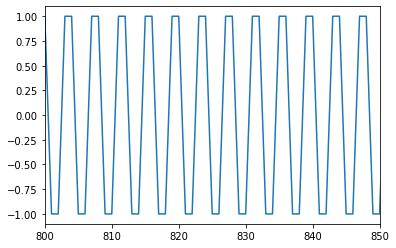

In [6]:
# BUILDING OUT OF PERIODS... literally rewrote above
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

BUFFER_SIZE = 2048 #buffer size
SOUND_LENGTH = BUFFER_SIZE / 4
samplef = 19e6 / 32 / 6 #for device
#t = np.arange(0,BUFFER_SIZE/samplef,1/samplef)
f1 = 20e3
f2 = 30e3
FREQ_STEPS = 200
diff = (np.abs(f2-f1)/FREQ_STEPS)

sq_full = []
t = 0

for i in range (FREQ_STEPS):
    f = f1 + i*diff
    t_new = np.arange(0,1/f,1/samplef)
    sq_temp = signal.square(2*np.pi*t_new*f)
    for j in sq_temp:
        sq_full.append(j)
        t += 1/f
t_sq = np.arange(0,SOUND_LENGTH/samplef,1/samplef)
print(SOUND_LENGTH/samplef,t)
print(SOUND_LENGTH,len(sq_full))
plt.plot(sq_full)
plt.xlim(800,850)

128 128


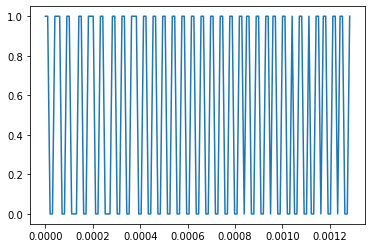

In [7]:
# USING CHIRP

from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

BUFFER_SIZE = 2048 #buffer size
SOUND_LENGTH = BUFFER_SIZE / 16
samplef = 19e6 / 32 / 6 #for device
#t = np.arange(0,BUFFER_SIZE/samplef,1/samplef)
f1 = 20e3
f2 = 30e3

t_sq = np.arange(0,SOUND_LENGTH/samplef,1/samplef)
t = 0
t1 = SOUND_LENGTH / samplef
chirp = np.round((signal.chirp(t_sq, f1, t1, f2, method='linear', phi=0, vertex_zero=True)+1)/2)
print(len(chirp),len(t_sq))
plt.plot(t_sq,chirp)
#plt.plot(t_sq,(signal.square(2*np.pi*25e3*t_sq)+1)/2)
#plt.xlim(200,250)

255 255 128


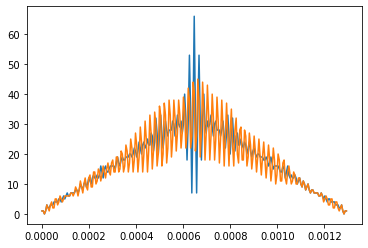

In [8]:
t1 = SOUND_LENGTH / samplef
chirp = np.round((signal.chirp(t_sq, f1, t1, f2, method='linear', phi=0, vertex_zero=True)+1)/2)
#print(np.correlate(chirp,chirp,"full"))


ac = np.correlate(chirp,chirp,"full")
t = np.linspace(0,SOUND_LENGTH/samplef,len(ac))
plt.plot(t,ac)

t_sq = np.arange(0,SOUND_LENGTH/samplef,1/samplef)
s25 = (signal.square(2*np.pi*25000*t_sq)+1)/2

xc = np.correlate(s25,chirp,"full")
plt.plot(t,xc)
print(len(np.correlate(s25,chirp,"full")),len(np.correlate(chirp,chirp,"full")),len(t_sq))

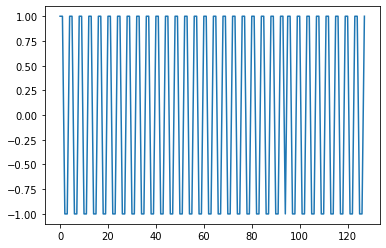

In [9]:
plt.plot(signal.square(2*np.pi*25e3*t_sq))

In [158]:
BUFFER_SIZE = 2048 #buffer size
SOUND_LENGTH = BUFFER_SIZE / 16
samplef = 19e6 / 32 / 6 #for device
t = np.arange(0,BUFFER_SIZE/samplef,1/samplef)
#t = np.linspace(0,BUFFER_SIZE/samplef,BUFFER_SIZE)
freq = np.arange(BUFFER_SIZE/2 + 1) * samplef/BUFFER_SIZE
f = 5000 #32e3
#f = 24739.583333333332
#f = 32986.11111111111
#t_sq = np.linspace(0,SOUND_LENGTH/samplef,samplef)
t_sq = np.arange(0,SOUND_LENGTH/samplef,1/samplef)
sq_wave = signal.square(2 * np.pi * t_sq * f) #9499

print(sq_wave)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.]
